In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv( './titanic.csv' )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.shape

(891, 12)

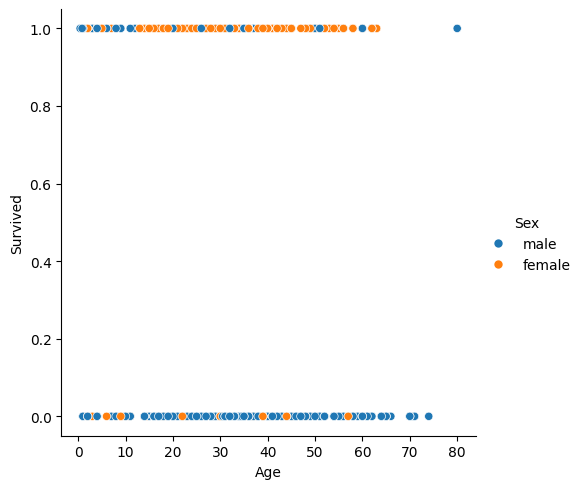

In [10]:
sns.relplot(df, x='Age', y='Survived', kind='scatter', hue='Sex')

<Axes: xlabel='Age'>

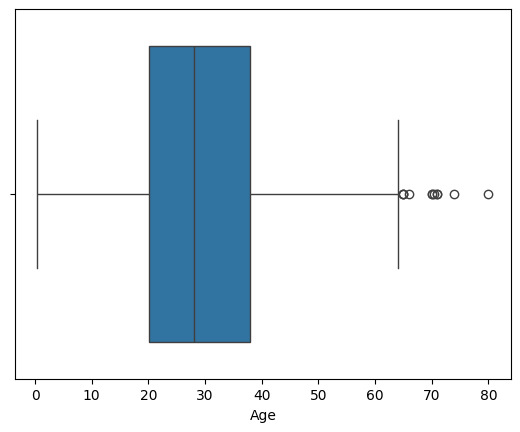

In [20]:
sns.boxplot(df, x='Age')

In [11]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [12]:
df.groupby(['Sex','Pclass'],as_index=False)[['Survived','Age']].mean().sort_values('Survived',ascending=False)

,Sex,Pclass,Survived,Age
0,female,1,0.968085,34.611765
1,female,2,0.921053,28.722973
2,female,3,0.500000,21.750000
3,male,1,0.368852,41.281386
4,male,2,0.157407,30.740707
5,male,3,0.135447,26.507589


In [13]:
df['Age'] = df['Age'].fillna(
    df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')
)
df['Age'].astype(int)
# df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    21
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [49]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [14]:
df['Family']=df['Parch']+df['SibSp']+1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,Mr,1


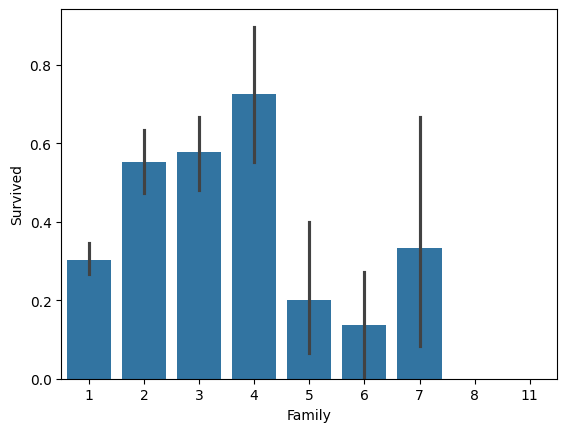

In [63]:
sns.barplot(df,x='Family',y='Survived')
plt.savefig('family.jpg')


<Axes: xlabel='Embarked', ylabel='Survived'>

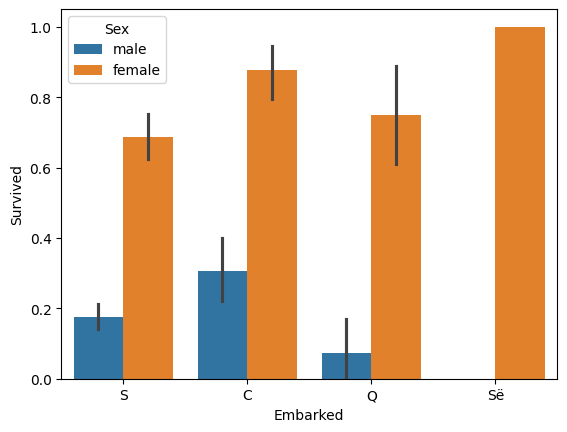

In [15]:
sns.barplot(df,x='Embarked',y='Survived',hue='Sex')
# df['Embarked'].value_counts()

In [16]:
df['Age']=df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
 13  Family       891 non-null    int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 97.6+ KB


<Axes: xlabel='Survived', ylabel='Fare'>

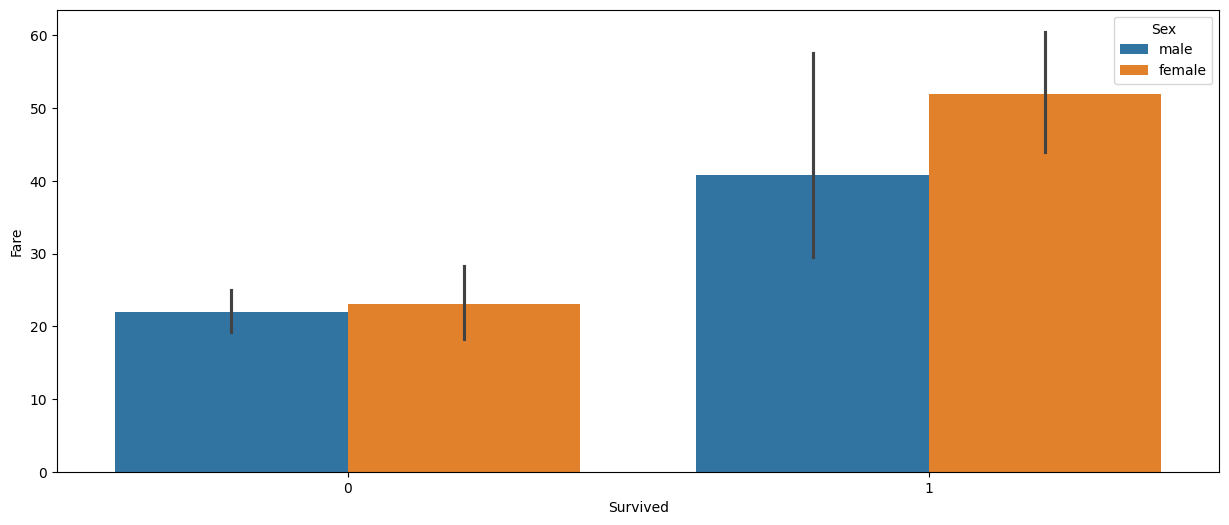

In [4]:
plt.figure(figsize=(15,6))
sns.barplot(df,x='Survived',y='Fare',hue='Sex')

In [17]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Mr,1


In [18]:
df=df.drop('Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,Mr,1


In [19]:
df=df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        889 non-null    object 
 12  Family       889 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 97.2+ KB


In [ ]:
df=df.drop(['Parch','SibSp'],axis=1)

In [22]:
df=df.drop(['Ticket'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,13.0000,S,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,30.0000,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,23.4500,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26,30.0000,C,Mr,1


In [23]:
df=df.drop('Name',axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,male,22,7.2500,S,Mr,2
1,2,1,1,female,38,71.2833,C,Mrs,2
2,3,1,3,female,26,7.9250,S,Miss,1
3,4,1,1,female,35,53.1000,S,Mrs,2
4,5,0,3,male,35,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,13.0000,S,Rev,1
887,888,1,1,female,19,30.0000,S,Miss,1
888,889,0,3,female,21,23.4500,S,Miss,4
889,890,1,1,male,26,30.0000,C,Mr,1


<Axes: xlabel='Embarked', ylabel='Survived'>

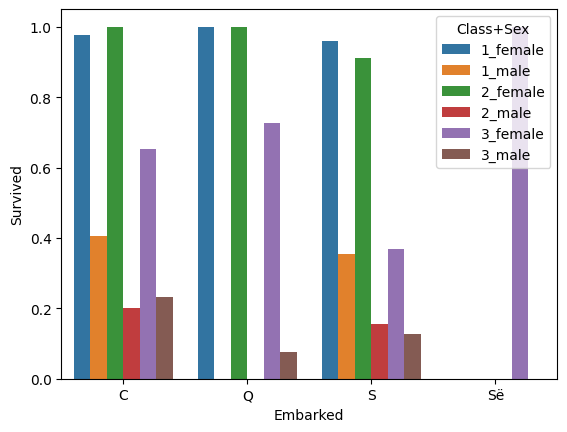

In [31]:
d_per_E_P=df.groupby(['Embarked','Pclass','Sex'],as_index=False)['Survived'].mean()
d_per_E_P['Class+Sex']=d_per_E_P['Pclass'].astype(str)+'_'+d_per_E_P['Sex']
# d_per_E_P
sns.barplot(d_per_E_P,x='Embarked',y='Survived',hue='Class+Sex')

In [32]:
df.to_csv('proceeded_titanic.csv',index=False)

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
